Part 1
Given that
$$
\exp \left(-\frac{1}{2}(\tau+n \phi)\left(\theta-\frac{\tau \theta_0+\phi \sum_{i=1}^n x_i}{\tau+n \phi}\right)^2\right)
$$

Then we expand the square
$$
\theta^2-2 \theta \frac{\tau \theta_0+\phi \sum_{i=1}^n x_i}{\tau+n \phi}+\left(\frac{\tau \theta_0+\phi \sum_{i=1}^n x_i}{\tau+n \phi}\right)^2
$$

Multiplying through by $-\frac{1}{2}(\tau+n \phi)$
$$
-\frac{1}{2}(\tau+n \phi) \theta^2+\left(\tau \theta_0+\phi \sum_{i=1}^n x_i\right) \theta-\frac{1}{2}\left(\tau \theta_0+\phi \sum_{i=1}^n x_i\right)^2\left(\frac{1}{\tau+n \phi}\right)
$$

Then, the given expression can be written as:
$$
\exp\left(-\frac{1}{2}(\tau+n \phi) \theta^2+\left(\tau \theta_0+\phi \sum_{i=1}^n x_i\right) \theta-\frac{1}{2}\left(\tau \theta_0+\phi \sum_{i=1}^n x_i\right)^2\left(\frac{1}{\tau+n \phi}\right)\right)
$$

Now this expression is a quadratic in $\theta$ because we have a $\theta^2$ term, a $\theta$ term, and a constant term.
<br>

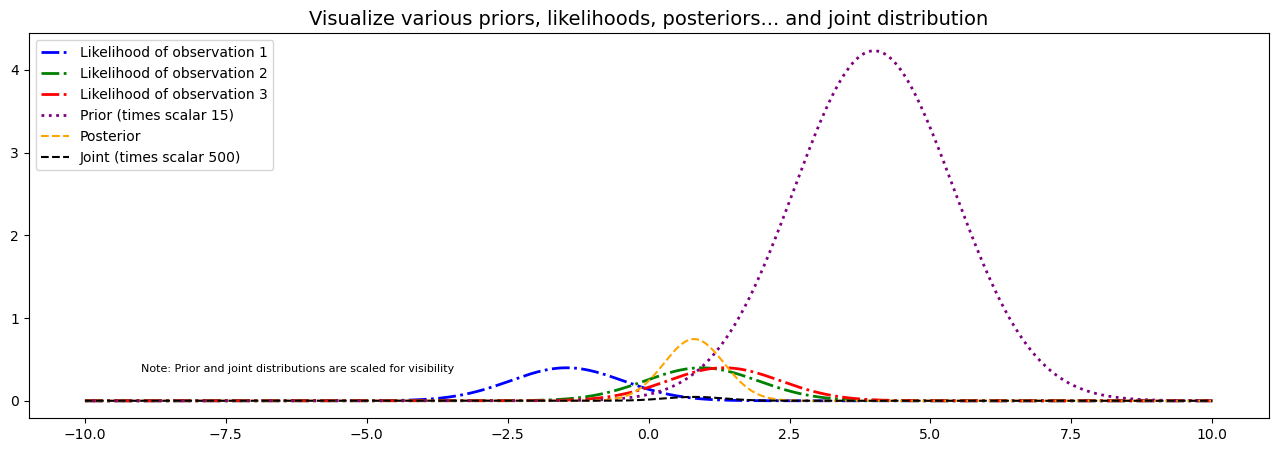

In [4]:
#Part2
#1
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

n = 3; x = stats.norm(loc=0, scale=1).rvs(n); theta_0, tau = 4, 1/2; parameter_domain = np.linspace(-10, 10, 1001)

likelihoods = [stats.norm.pdf(parameter_domain, loc=xi, scale=1) for xi in x]
prior = stats.norm(loc=theta_0, scale=1/tau**0.5).pdf(parameter_domain) 
c = 500
joint = c * np.prod(likelihoods, axis=0) * prior
posterior = stats.norm(loc=(tau*theta_0 + x.sum()) / (tau + n), scale=1 / (tau + n)**0.5).pdf(parameter_domain)
plt.figure(figsize=(16, 5))
colors = ['blue', 'green', 'red'] 
for i, individual_likelihood in enumerate(likelihoods):
    plt.plot(parameter_domain, individual_likelihood, label=f"Likelihood of observation {i+1}", color=colors[i], linestyle='-.', linewidth=2)
plt.plot(parameter_domain, 15*prior, label="Prior (times scalar 15)", color='purple', linewidth=2, linestyle=':')
plt.plot(parameter_domain, posterior, label="Posterior", color='orange', linestyle='--')
plt.plot(parameter_domain, joint, linestyle="--", label="Joint (times scalar 500)", color='black')
plt.legend(loc='upper left', fontsize=10)
plt.title("Visualize various priors, likelihoods, posteriors... and joint distribution", fontsize=14)
plt.text(-9, 0.35, "Note: Prior and joint distributions are scaled for visibility", fontsize=8)
plt.show()


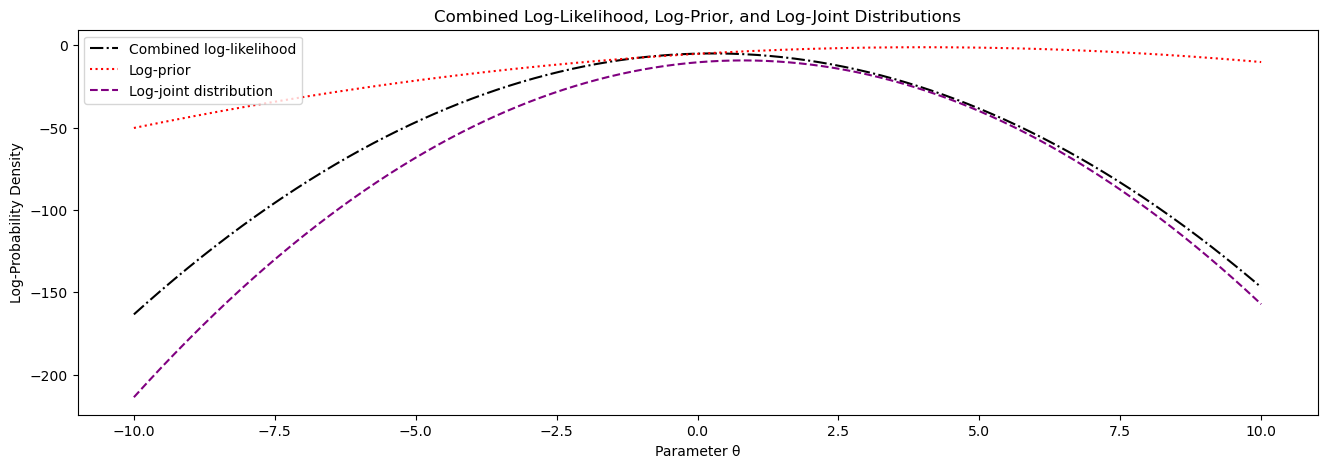

In [7]:
#2
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

n = 3; theta_0, tau = 4, 1/2; phi = 1 ; parameter_domain = np.linspace(-10, 10, 1001)
log_likelihoods = np.array([stats.norm.logpdf(xi, loc=parameter_domain, scale=1/phi**0.5) for xi in x])
combined_log_likelihood = log_likelihoods.sum(axis=0)
log_prior = stats.norm.logpdf(parameter_domain, loc=theta_0, scale=1/tau**0.5)
log_joint = combined_log_likelihood + log_prior

plt.figure(figsize=(16, 5))
plt.plot(parameter_domain, combined_log_likelihood, label="Combined log-likelihood", color='black', linestyle='-.')
plt.plot(parameter_domain, log_prior, label="Log-prior", color='red', linestyle=':')
plt.plot(parameter_domain, log_joint, label="Log-joint distribution", color='purple', linestyle='--')
plt.legend(loc='upper left')
plt.xlabel("Parameter θ")
plt.ylabel("Log-Probability Density")
plt.title("Combined Log-Likelihood, Log-Prior, and Log-Joint Distributions")
plt.show()

3.
The normal likelihood is given by:
$$
p(x \mid \theta, \phi)=\prod_{i=1}^n \sqrt{\frac{\phi}{2 \pi}} e^{-\frac{\phi}{2}\left(x_i-\theta\right)^2}
$$

With a uniform prior $p(\theta) \propto 1$, the posterior distribution is
$$
p(\theta \mid x) \propto \prod_{i=1}^n \sqrt{\frac{\phi}{2 \pi}} e^{-\frac{\phi}{2}\left(x_i-\theta\right)^2}
$$


4.
When using a log likelihood, we're focusing on the probability of the data given the parameters, without considering any prior beliefs. This is purely data-driven.

The log posterior, however, combines this log likelihood with the log of the prior. It represents the log of the probability of the parameters given the data.

With an improper uniform prior, the posterior distribution is primarily shaped by the likelihood, and the distinction between the log likelihood and log posterior becomes a matter of normalization. The improper prior does not influence the shape or location of the posterior but is important for ensuring that the posterior is properly normalized.